<a href="https://colab.research.google.com/github/Amrutha1103/002776773_Amrutha_Sai_Edara_AutoML/blob/main/AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Shark Tank India 


Shark Tank India is a business reality television program that is shown on Sony Entertainment Television in India and is in the Hindi language. The program is the Shark Tank Indian franchise from the United States. It depicts business owners giving pitches to a group of sharks or investors, who determine whether to fund their enterprise. Shark Tank India's first season began on December 20th, 2021, and ended on February 4th, 2022.


Data Set:



This dataset conatins 28 variables (includes numerical and categorical) and following: Episode_number - Number of the episode

Pitch_number - Number of the Pitch

Brand_name - Name of the brand Idea

Idea - behind the brand building Deal

Deal - done or not ; 1 - YES, 0 - NO

Pitcher_ask_amount - Amount asked by the pitchers

Ask_equity - Equity offered by the pitchers

Ask_valuation - Valuation asked by pitchers

Deal_amount - Final Deal Amount

Deal_equity - Final Deal equity percentage

Deal_valuation - Final Valuation of Company after Deal

Ashneer_present - Ashneer was present during the pitching ; 1 - YES, 0 - NO

Anupam_present - Anupam was present during the pitching ; 1 - YES, 0 - NO

Aman_present - Aman was present during the pitching ; 1 - YES, 0 - NO

Namita_present - Namita was present during the pitching ; 1 - YES, 0 - NO

Vineeta_present - Vineeta was present during the pitching ; 1 - YES, 0 - NO

Peyush_present - Peyush was present during the pitching ; 1 - YES, 0 - NO

Ghazal_present - Ghazal was present during the pitching ; 1 - YES, 0 - NO

Ashneer_deal - Ashneer is a part of Final Deal ; 1 - YES, 0 - NO

Anupam_deal - Anupam is a part of Final Deal ; 1 - YES, 0 - NO

Aman_deal - Aman is a part of Final Deal ; 1 - YES, 0 - NO

Namita_deal - Namita is a part of Final Deal ; 1 - YES, 0 - NO

Vineeta_deal - Vineeta is a part of Final Deal ; 1 - YES, 0 - NO

Peyush_deal - Peyush is a part of Final Deal ; 1 - YES, 0 - NO

Ghazal_deal - Ghazal is a part of Final Deal ; 1 - YES, 0 - NO

Total_sharks_invested - Number of total sharks invested in the Company

Amount_per_shark - Amount per shark invested

Equity_per_shark - Final Equity gained per Shark

In [84]:
#installing required packages
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
#importing all the libraries required for the assignment
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
import pandas as pd
import logging
import csv
import numpy as np
import matplotlib.pylab as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [105]:
#Initializing the H2o cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,7 hours 13 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_54zvhq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.165 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [106]:
#reading CSV file into pandas dataframe
url = "https://raw.githubusercontent.com/Amrutha1103/002776773_Amrutha_Sai_Edara_AutoML/main/Shark%20Tank%20India%20Dataset.csv"
data = pd.read_csv(url) 

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   episode_number         117 non-null    int64  
 1   pitch_number           117 non-null    int64  
 2   brand_name             117 non-null    object 
 3   idea                   117 non-null    object 
 4   deal                   117 non-null    int64  
 5   pitcher_ask_amount     117 non-null    float64
 6   ask_equity             117 non-null    float64
 7   ask_valuation          117 non-null    float64
 8   deal_amount            117 non-null    float64
 9   deal_equity            117 non-null    float64
 10  deal_valuation         117 non-null    float64
 11  ashneer_present        117 non-null    int64  
 12  anupam_present         117 non-null    int64  
 13  aman_present           117 non-null    int64  
 14  namita_present         117 non-null    int64  
 15  vineet

In [108]:
#checking for the null values in the dataset
data.isnull().sum()

episode_number           0
pitch_number             0
brand_name               0
idea                     0
deal                     0
pitcher_ask_amount       0
ask_equity               0
ask_valuation            0
deal_amount              0
deal_equity              0
deal_valuation           0
ashneer_present          0
anupam_present           0
aman_present             0
namita_present           0
vineeta_present          0
peyush_present           0
ghazal_present           0
ashneer_deal             0
anupam_deal              0
aman_deal                0
namita_deal              0
vineeta_deal             0
peyush_deal              0
ghazal_deal              0
total_sharks_invested    0
amount_per_shark         0
equity_per_shark         0
dtype: int64

In [109]:
#checking for the shape of the dataframe
data.shape

(117, 28)

In [110]:
data.head()

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000


In [111]:
#displaying columns in the dataset
columns = list(data.columns)
print(columns)
#to check the statistical description of dataset
data.describe()

['episode_number', 'pitch_number', 'brand_name', 'idea', 'deal', 'pitcher_ask_amount', 'ask_equity', 'ask_valuation', 'deal_amount', 'deal_equity', 'deal_valuation', 'ashneer_present', 'anupam_present', 'aman_present', 'namita_present', 'vineeta_present', 'peyush_present', 'ghazal_present', 'ashneer_deal', 'anupam_deal', 'aman_deal', 'namita_deal', 'vineeta_deal', 'peyush_deal', 'ghazal_deal', 'total_sharks_invested', 'amount_per_shark', 'equity_per_shark']


,episode_number,pitch_number,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,ashneer_present,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,18.735043,59.000000,0.555556,319.854709,5.188034,3852.462479,31.982915,8.963504,467.104872,0.837607,...,0.179487,0.205128,0.239316,0.188034,0.128205,0.230769,0.059829,1.230769,18.132481,5.583590
std,10.070778,33.919021,0.499041,2767.842777,3.892121,11931.601957,36.687391,13.106769,919.988864,0.370397,...,0.385410,0.405532,0.428501,0.392420,0.335756,0.423137,0.238190,1.410457,23.588682,10.803799
min,1.000000,1.000000,0.000000,0.001010,0.250000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,30.000000,0.000000,45.000000,2.500000,666.670000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,59.000000,1.000000,50.000000,5.000000,1250.000000,25.000000,3.000000,100.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.250000
75%,27.000000,88.000000,1.000000,80.000000,7.500000,2857.140000,50.000000,15.000000,500.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,25.000000,6.000000
max,35.000000,117.000000,1.000000,30000.000000,25.000000,120000.000000,150.000000,75.000000,6666.670000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,100.000000,75.000000


In [112]:
#To check the correlation between all the features in the dataset
data.corr()

,episode_number,pitch_number,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,ashneer_present,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
episode_number,1.000000,0.998850,-0.214033,-0.069500,-0.077674,-0.070829,-0.187023,-0.114719,-0.146336,-0.342116,...,-0.116462,-0.121671,-0.264855,-0.041819,-0.035758,0.022564,0.229482,-0.121894,-0.157896,-0.073187
pitch_number,0.998850,1.000000,-0.223068,-0.074881,-0.080792,-0.073517,-0.199542,-0.119973,-0.151003,-0.338967,...,-0.117380,-0.129104,-0.272245,-0.053756,-0.028765,0.013214,0.226210,-0.131541,-0.166871,-0.079109
deal,-0.214033,-0.223068,1.000000,-0.106927,-0.076438,-0.151695,0.736002,0.609043,0.409138,-0.020728,...,0.373509,0.454369,0.461369,0.430422,0.342997,0.489898,0.225630,0.759342,0.653882,0.461046
pitcher_ask_amount,-0.069500,-0.074881,-0.106927,1.000000,0.470198,0.911174,-0.080719,-0.067233,-0.045988,0.040759,...,-0.044099,-0.050348,-0.053685,-0.045850,-0.036575,-0.052946,-0.024308,-0.084288,-0.071281,-0.050873
ask_equity,-0.077674,-0.080792,-0.076438,0.470198,1.000000,0.260603,-0.177955,0.288341,-0.310331,-0.047404,...,-0.088782,0.013584,-0.140932,0.027449,0.096837,-0.026575,0.071451,-0.028387,-0.165141,0.238074
ask_valuation,-0.070829,-0.073517,-0.151695,0.911174,0.260603,1.000000,-0.090163,-0.155565,0.017869,0.053817,...,-0.052650,-0.095488,-0.085926,-0.075664,-0.068814,-0.089131,-0.050633,-0.140668,-0.066631,-0.118541
deal_amount,-0.187023,-0.199542,0.736002,-0.080719,-0.177955,-0.090163,1.000000,0.370487,0.636411,-0.026851,...,0.392853,0.335148,0.482279,0.443929,0.315109,0.384539,0.188542,0.695950,0.793392,0.239212
deal_equity,-0.114719,-0.119973,0.609043,-0.067233,0.288341,-0.155565,0.370487,1.000000,-0.082694,-0.093570,...,0.127167,0.267897,0.150735,0.136270,0.359560,0.399927,0.188478,0.432880,0.359031,0.897922
deal_valuation,-0.146336,-0.151003,0.409138,-0.045988,-0.310331,0.017869,0.636411,-0.082694,1.000000,0.018973,...,0.206179,0.219510,0.360149,0.178616,-0.001066,0.138179,-0.002742,0.319298,0.581751,-0.080662
ashneer_present,-0.342116,-0.338967,-0.020728,0.040759,-0.047404,0.053817,-0.026851,-0.093570,0.018973,1.000000,...,0.205939,-0.005886,0.246972,-0.025346,-0.108422,-0.143856,-0.475201,-0.026656,-0.049810,-0.102568


<AxesSubplot:>

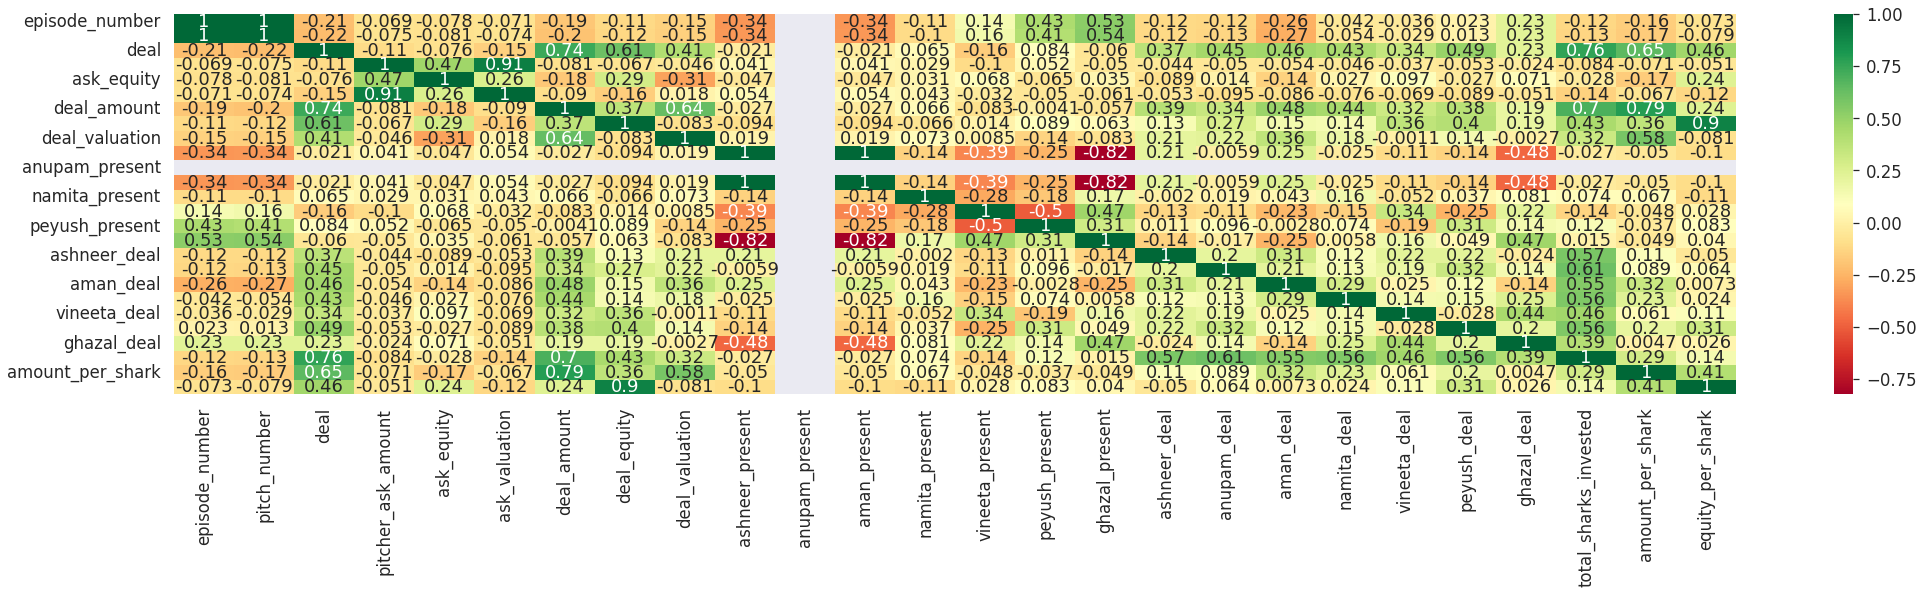

In [113]:
#To check the heatmap of the correlation
plt.figure(figsize=(35,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

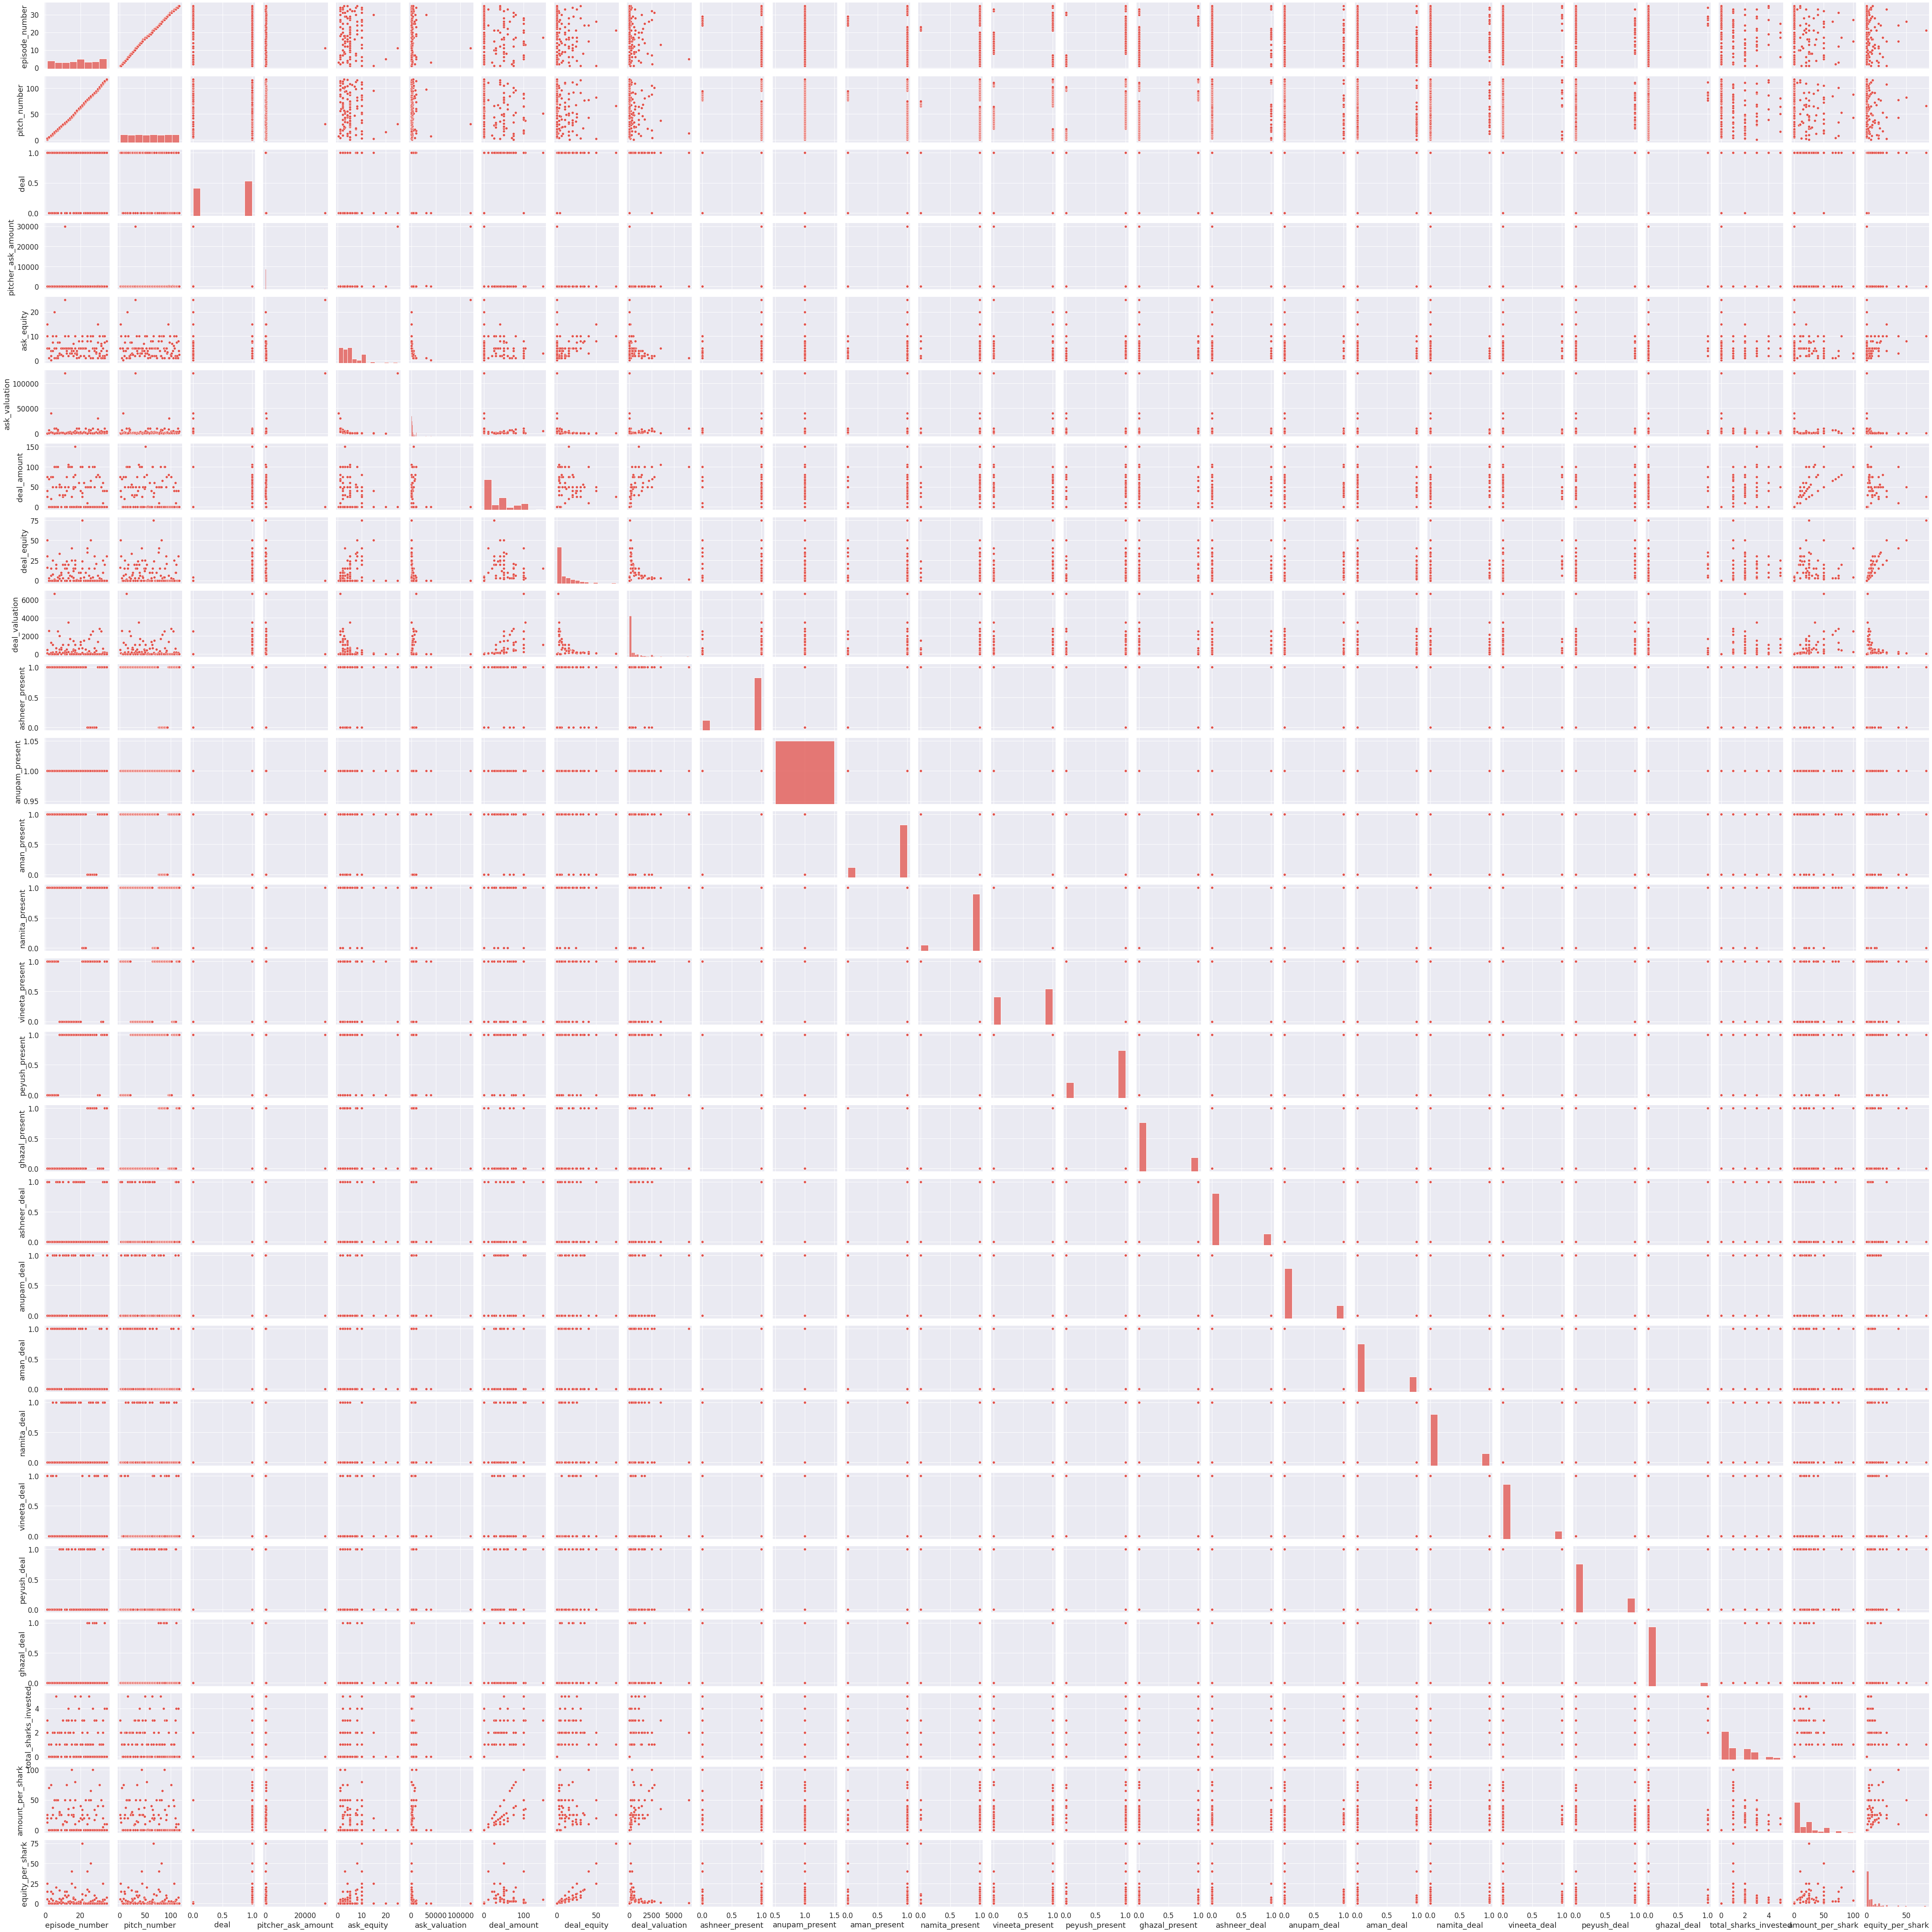

In [96]:
sns.pairplot(data) 

In [114]:
# #Using OLS for finding the p value to check the significant features
import statsmodels.api as sm
model = sm.OLS(data['deal'], data[['amount_per_shark','deal_valuation','ask_valuation','pitcher_ask_amount','ask_equity', 'deal_amount', 'deal_equity','equity_per_shark']
]).fit()
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   deal   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                              81.43
Date:                Tue, 28 Feb 2023   Prob (F-statistic):                    2.00e-42
Time:                        03:44:12   Log-Likelihood:                         -17.992
No. Observations:                 117   AIC:                                      51.98
Df Residuals:                     109   BIC:                                      74.08
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
amount_per_shark       0.0063      0.002      2.616      0.010       0.002       0.011
deal_valuation      8.324e-05   4.45e-05      1.870      0.064      -5e-06       0.000
ask_valuation       5.368e-06   5.21e-06      1.031      0.305   -4.95e-06    1.57e-05
pitcher_ask_amount -3.021e-05   2.33e-05     -1.295      0.198   -7.64e-05     1.6e-05
ask_equity             0.0105      0.006      1.745      0.084      -0.001       0.022
deal_amount            0.0037      0.002      2.184      0.031       0.000       0.007
deal_equity            0.0335      0.006      5.224      0.000       0.021       0.046
equity_per_shark      -0.0219      0.007     -2.945      0.004      -0.037      -0.007
==============================================================================
Omnibus:                       19.411   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.770
Skew:                           0.589   Prob(JB):                     6.98e-11
Kurtosis:                       5.864   Cond. No.                     4.67e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
# the independent variables set
X = data[['pitcher_ask_amount', 'ask_equity', 'ask_valuation', 'deal_amount',
       'deal_equity', 'deal_valuation','total_sharks_invested', 'amount_per_shark', 'equity_per_shark']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["features"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                features        VIF
0     pitcher_ask_amount   5.745616
1             ask_equity   2.133708
2          ask_valuation   5.791167
3            deal_amount  15.333698
4            deal_equity  18.994681
5         deal_valuation   2.905794
6  total_sharks_invested   7.461022
7       amount_per_shark   8.453980
8       equity_per_shark  13.508322


In [116]:
from sklearn.model_selection import  train_test_split
X = data[ ['pitcher_ask_amount', 'ask_equity', 'ask_valuation', 'deal_amount',
       'deal_equity', 'deal_valuation','total_sharks_invested', 'amount_per_shark', 'equity_per_shark']]

y = data['deal']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [117]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [118]:
# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.27640965231695214

In [120]:
aml = H2OAutoML(max_models =10,
                balance_classes=True,
		seed =1)

In [121]:
data = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [123]:
train, test = data.split_frame(ratios=[0.8], seed = 1)

In [124]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

In [125]:
drift_data["is_train"].table()

is_train,Count
0,18
1,99


In [126]:
x = list(set(train.col_names) - set(["deal"]))
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y="deal", training_frame=train)

AutoML progress: |
21:05:33.906: _train param, Dropping bad and constant columns: [brand_name, anupam_present, idea, is_train]
21:05:33.906: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
21:05:35.717: _train param, Dropping bad and constant columns: [brand_name, anupam_present, idea, is_train]
21:05:35.718: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
21:05:36.538: _train param, Dropping bad and constant columns: [brand_name, anupam_present, idea, is_train]
21:05:36.538: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target 

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_8_AutoML_2_20230227_211311


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    41                 41                          5506                   1            5            3.73171       2             7             6.07317

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.012071916124430395
RMSE: 0.1098722718634251
MAE: 0.03947963302918578
RMSLE: 0.0761344155762714
Mean Residual Deviance: 0.012071916124430395

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.02567530431826128
RMSE: 0.16023515319136836
MAE: 0.059076336025017696
RMSLE: 0.10851315351473283
Mean Residual Deviance: 0.02567530431826128

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.0598017  0.0174974  0.0431344     0.0780424     0.0752907     0.0405784     0.0619625
mean_residual_deviance  0.0267421  0.0243581  0.00695953    0.0507595     0.0548415     0.00376499    0.0173848
mse                     0.0267421  0.0243581  0.00695953    0.0507595     0.0548415     0.00376499    0.0173848
r2                      0.88476    0.1048     0.971881      0.788502      0.758939      0.98494       0.919539
residual_deviance       0.0267421  0.0243581  0.00695953    0.0507595     0.0548415     0.00376499    0.0173848
rmse                    0.147223   0.0795879  0.0834238     0.225299      0.234183      0.0613595     0.131852
rmsle                   0.0970085  0.0602238  0.0462896     0.158766      0.163913      0.0406094     0.0754644

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-02-27 21:13:19  1.216 sec   0                  0.496904         0.493827        0.246914
    2023-02-27 21:13:19  1.232 sec   5                  0.311542         0.304946        0.0970586
    2023-02-27 21:13:19  1.247 sec   10                 0.214036         0.195518        0.0458113
    2023-02-27 21:13:19  1.260 sec   15                 0.165217         0.129909        0.0272968
    2023-02-27 21:13:19  1.282 sec   20                 0.144448         0.0922074       0.0208651
    2023-02-27 21:13:19  1.298 sec   25                 0.129674         0.0654732       0.0168153
    2023-02-27 21:13:19  1.312 sec   30                 0.121484         0.0501401       0.0147584
    2023-02-27 21:13:19  1.326 sec   35                 0.114247         0.0414158       0.0130524
    2023-02-27 21:13:19  1.339 sec   40                 0.110587         0.0392755       0.0122295
    2023-02-27 21:13:19  1.343 sec   41                 0.109872         0.0394796       0.0120719

Variable Importances: 
variable               relative_importance     scaled_importance       percentage
---------------------  ----------------------  ----------------------  ----------------------
total_sharks_invested  43.991249084472656      1.0                     0.3623135747982547
deal_equity            42.910404205322266      0.9754304571558099      0.35341169589921734
equity_per_shark       22.86127281188965       0.5196777379062615      0.1882862989638881
deal_valuation         7.280841827392578       0.16550659458229514     0.05996528593579681
pitch_number           1.1740632057189941      0.02668856261536335     0.009669628527399355
pitcher_ask_amount     1.0479859113693237    

Leaderboard shows models with their metrics. when provided with H2OAutoML object, the leaderboard shows the 5-fold cross-validation by default. Otherwise it shows metrics computed on the frame

In [127]:
# To view the leader model
lb = aml.leaderboard
#to view the entire leaderboard, specify the rows argument of the head() method as the total number of rows
lb.head(rows=lb.nrows)

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
GBM_8_AutoML_2_20230227_211311,0.0590763,0.160235,0.0256753,0.108513,0.0256753
GBM_3_AutoML_1_20230227_210533,0.0590763,0.160235,0.0256753,0.108513,0.0256753
GBM_13_AutoML_3_20230228_34500,0.061866,0.163169,0.0266242,0.110461,0.0266242
GBM_12_AutoML_3_20230228_34500,0.0642086,0.176209,0.0310495,0.117259,0.0310495
GBM_9_AutoML_2_20230227_211311,0.0644676,0.171335,0.0293555,0.114852,0.0293555
GBM_4_AutoML_1_20230227_210533,0.0644676,0.171335,0.0293555,0.114852,0.0293555
DRF_2_AutoML_2_20230227_211311,0.0645465,0.177503,0.0315074,0.120894,0.0315074
DRF_1_AutoML_1_20230227_210533,0.0645465,0.177503,0.0315074,0.120894,0.0315074
GBM_14_AutoML_3_20230228_34500,0.0647169,0.172592,0.0297879,0.115546,0.0297879
StackedEnsemble_BestOfFamily_1_AutoML_1_20230227_210533,0.0648144,0.164685,0.027121,0.112787,0.027121


In [128]:
# to get leaderboard with all possible columns(such as training time, prediction speed,..)
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,mae,rmse,mse,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_8_AutoML_2_20230227_211311,0.0590763,0.160235,0.0256753,0.108513,0.0256753,130,0.01713,GBM
GBM_3_AutoML_1_20230227_210533,0.0590763,0.160235,0.0256753,0.108513,0.0256753,218,0.012979,GBM
GBM_13_AutoML_3_20230228_34500,0.061866,0.163169,0.0266242,0.110461,0.0266242,93,0.083906,GBM
GBM_12_AutoML_3_20230228_34500,0.0642086,0.176209,0.0310495,0.117259,0.0310495,133,0.069822,GBM
GBM_9_AutoML_2_20230227_211311,0.0644676,0.171335,0.0293555,0.114852,0.0293555,123,0.016453,GBM
GBM_4_AutoML_1_20230227_210533,0.0644676,0.171335,0.0293555,0.114852,0.0293555,273,0.012657,GBM
DRF_2_AutoML_2_20230227_211311,0.0645465,0.177503,0.0315074,0.120894,0.0315074,60,0.007278,DRF
DRF_1_AutoML_1_20230227_210533,0.0645465,0.177503,0.0315074,0.120894,0.0315074,89,0.006145,DRF
GBM_14_AutoML_3_20230228_34500,0.0647169,0.172592,0.0297879,0.115546,0.0297879,92,0.030795,GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20230227_210533,0.0648144,0.164685,0.027121,0.112787,0.027121,982,0.044133,StackedEnsemble


Pareto Front plot shows a Pareto front for any given dataframe,but it can also be used with AutoMLs. It is used to determine the optimal subset with regards to multiple criteria. The pareto_front function returns a subset of the input frame/leaderboard and a plot depicting a pareto front as shown below:

model_id,mae,rmse,mse,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_3_AutoML_1_20230227_210533,0.0590763,0.160235,0.0256753,0.108513,0.0256753,218,0.012979,GBM
GBM_4_AutoML_1_20230227_210533,0.0644676,0.171335,0.0293555,0.114852,0.0293555,273,0.012657,GBM
DRF_1_AutoML_1_20230227_210533,0.0645465,0.177503,0.0315074,0.120894,0.0315074,89,0.006145,DRF
XGBoost_5_AutoML_2_20230227_211311,0.0724689,0.172196,0.0296516,0.116244,0.0296516,408,0.005176,XGBoost
XGBoost_4_AutoML_2_20230227_211311,0.0744195,0.178455,0.0318462,0.119304,0.0318462,1019,0.003723,XGBoost


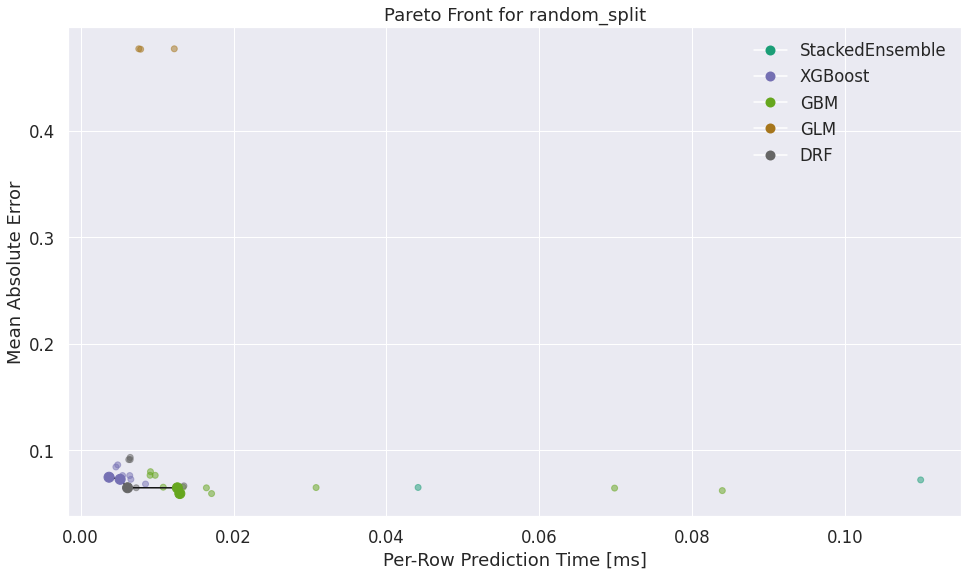

In [129]:
pf = aml.pareto_front()
pf.figure()
pf

In [130]:
# to get the best model
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_8_AutoML_2_20230227_211311


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    41                 41                          5506                   1            5            3.73171       2             7             6.07317

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.012071916124430395
RMSE: 0.1098722718634251
MAE: 0.03947963302918578
RMSLE: 0.0761344155762714
Mean Residual Deviance: 0.012071916124430395

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.02567530431826128
RMSE: 0.16023515319136836
MAE: 0.059076336025017696
RMSLE: 0.10851315351473283
Mean Residual Deviance: 0.0

In [131]:
best_model.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.0036610820963248647
RMSE: 0.06050687643834265
MAE: 0.044888352043926716
RMSLE: 0.04117753349169826
Mean Residual Deviance: 0.0036610820963248647

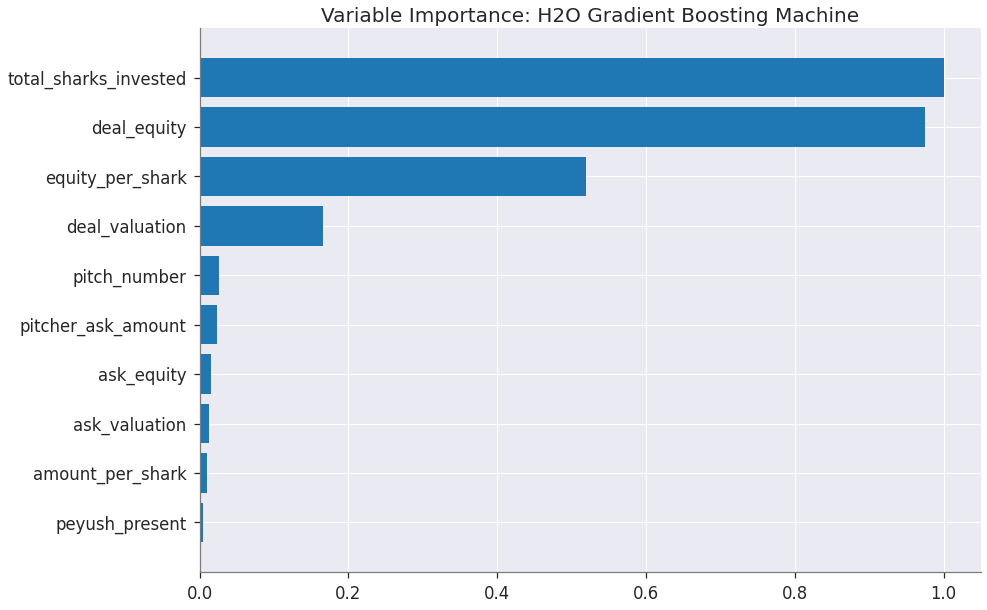

<Figure size 576x396 with 0 Axes>

In [132]:
##explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])

#plot variables in order of their importance for price prediction
if best_model.algo in ['gbm','drf','xrt','xgboost']:
    best_model.varimp_plot()
     

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

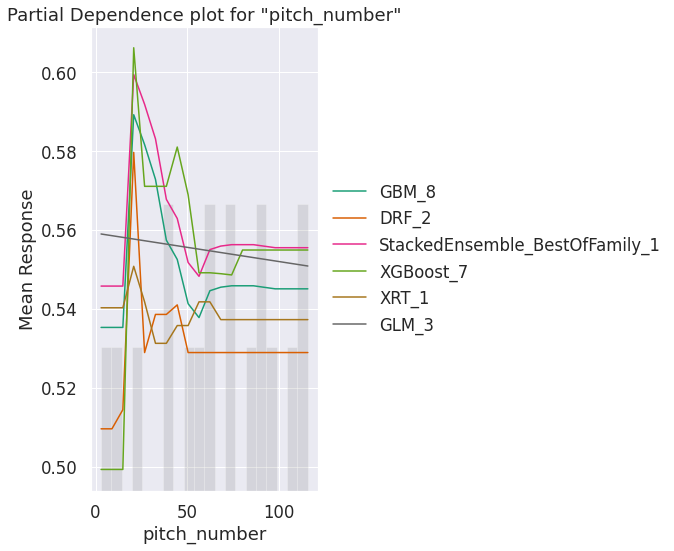

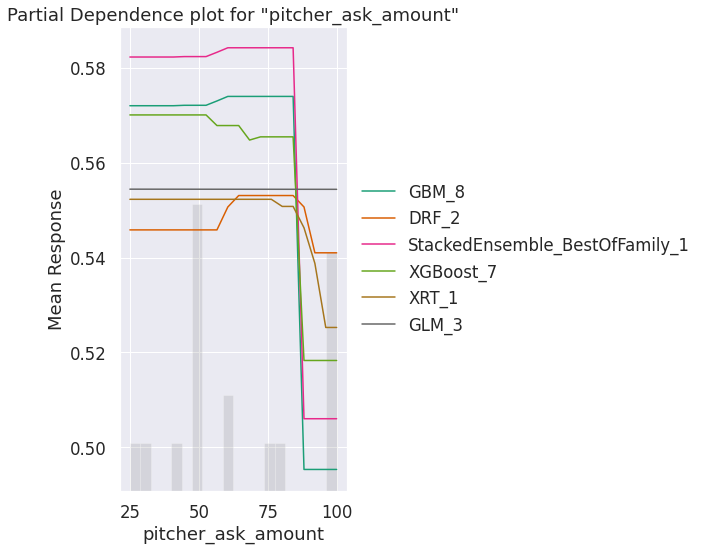

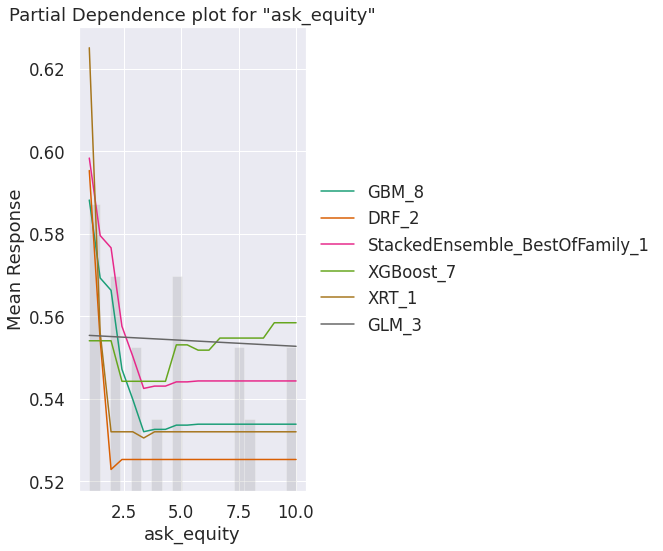

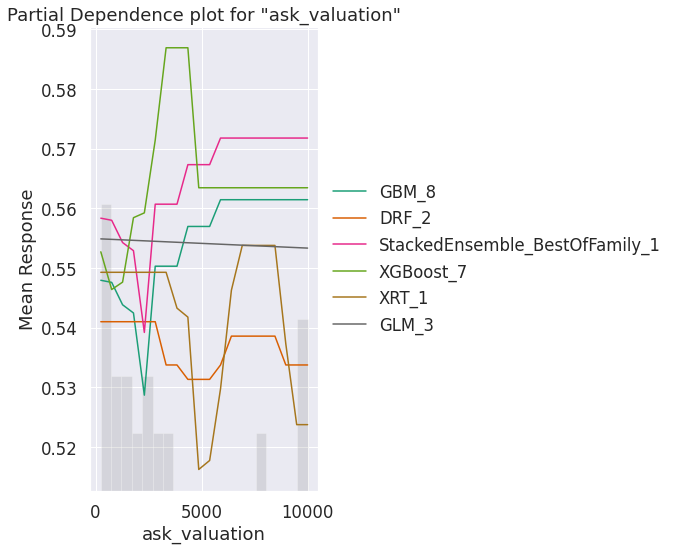

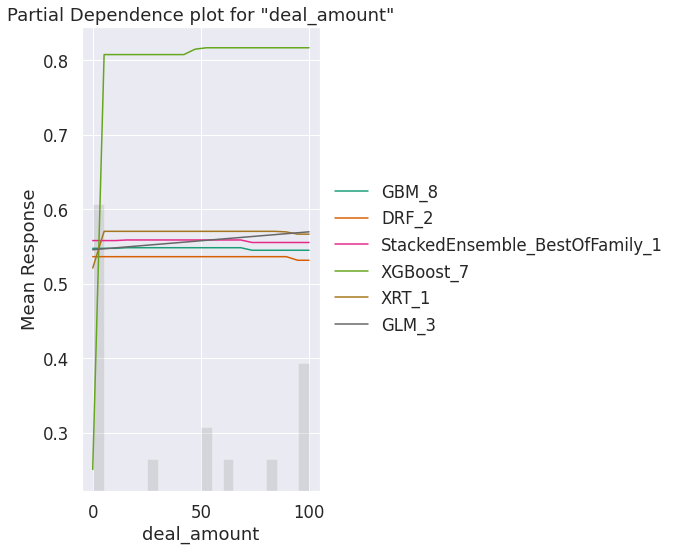

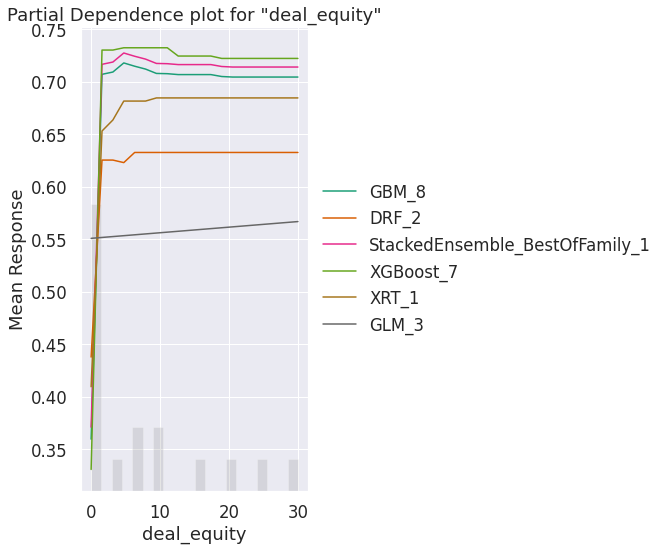

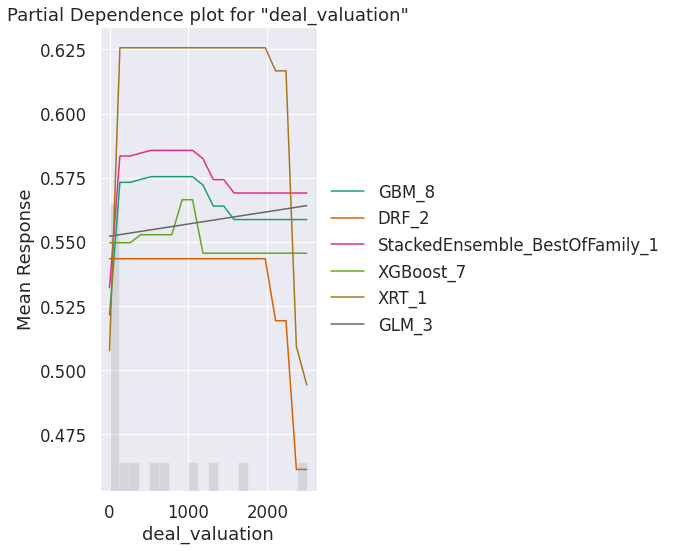

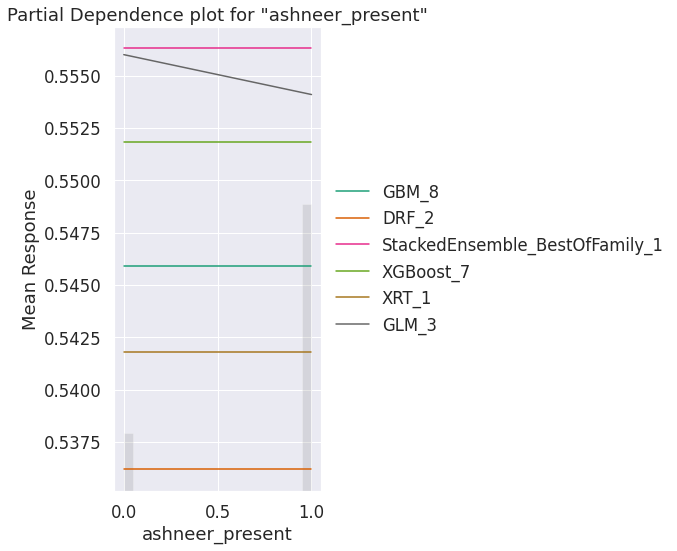

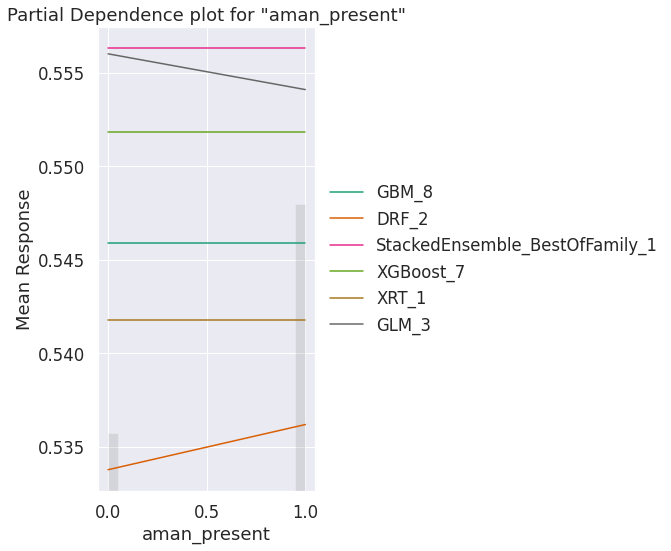

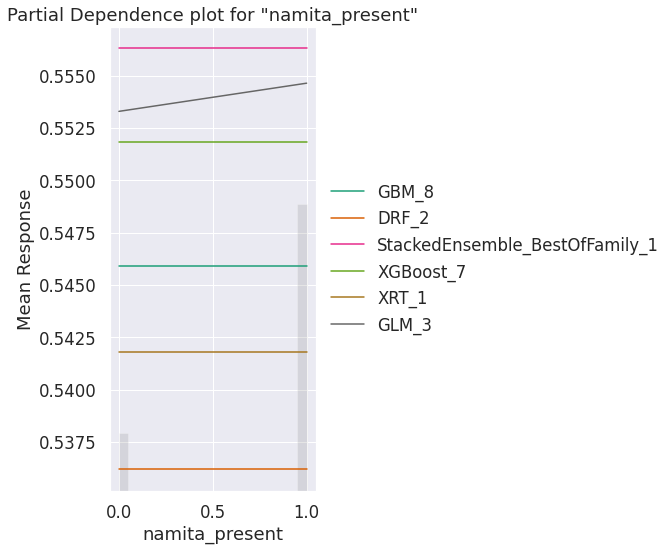

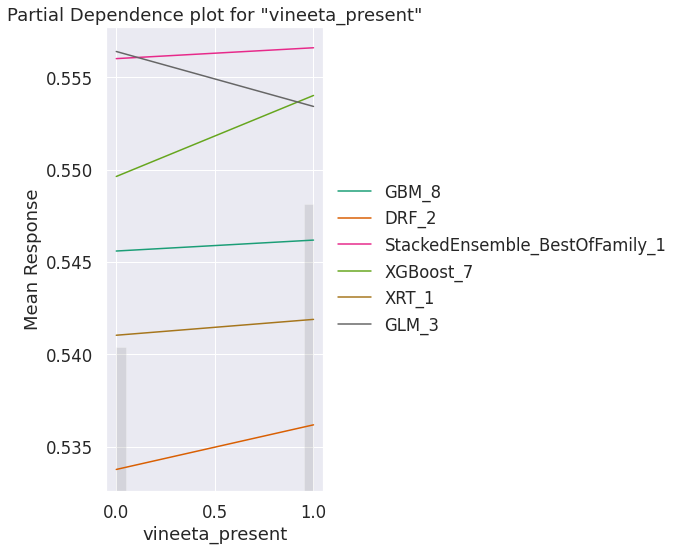

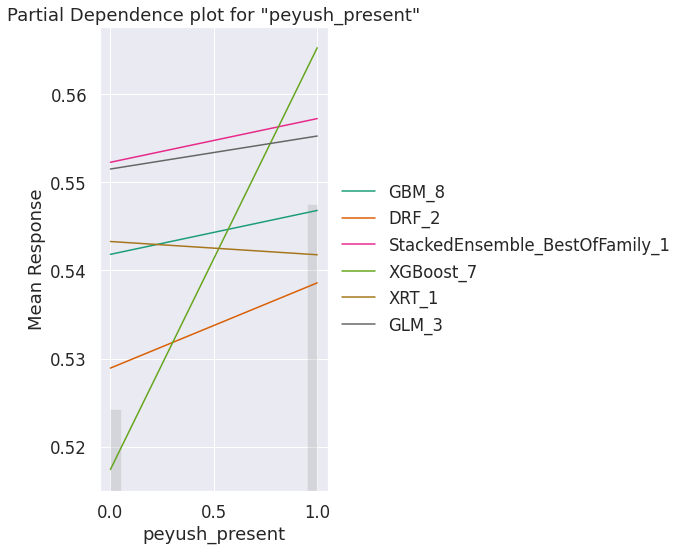

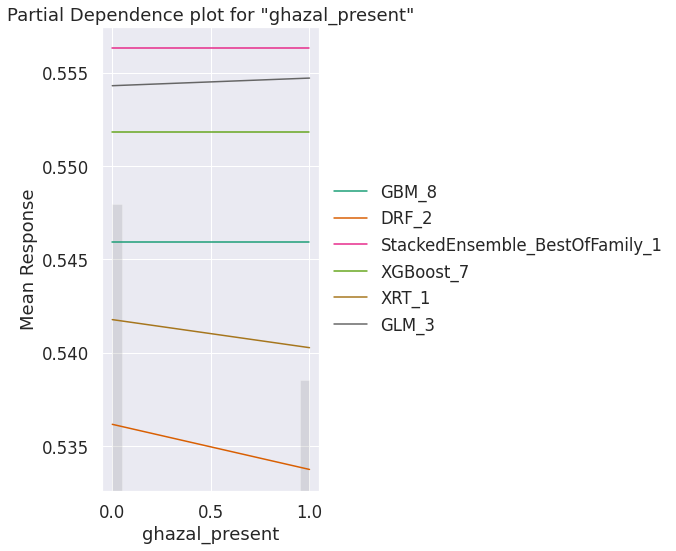

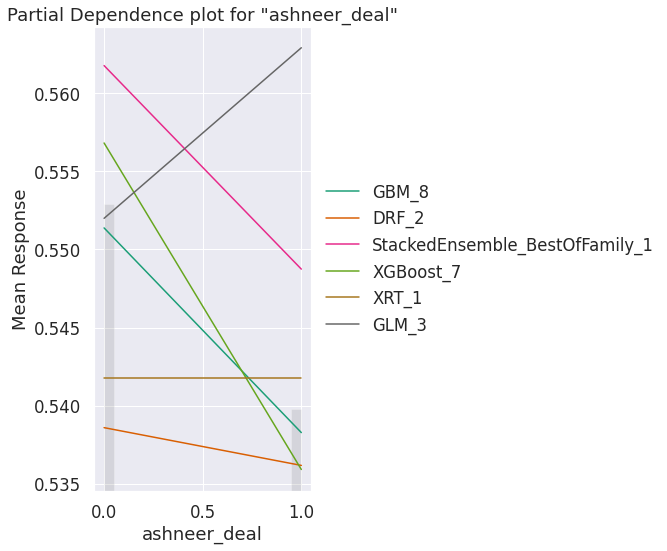

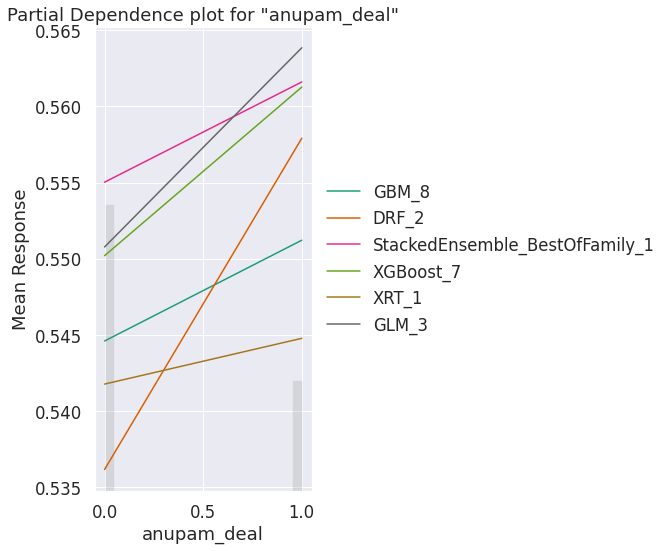

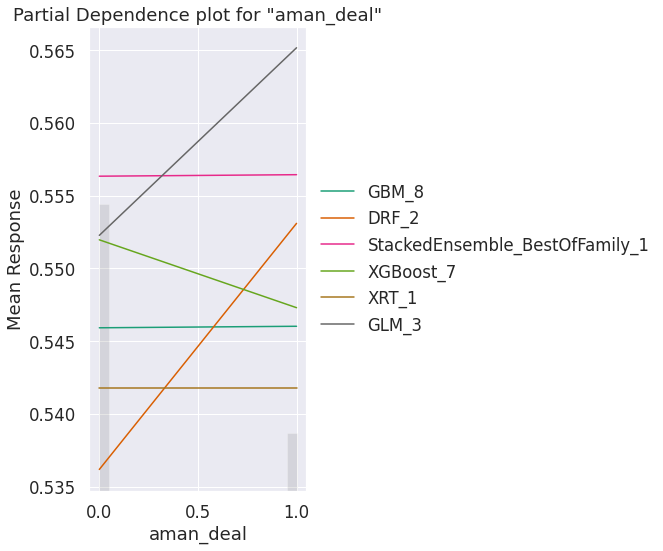

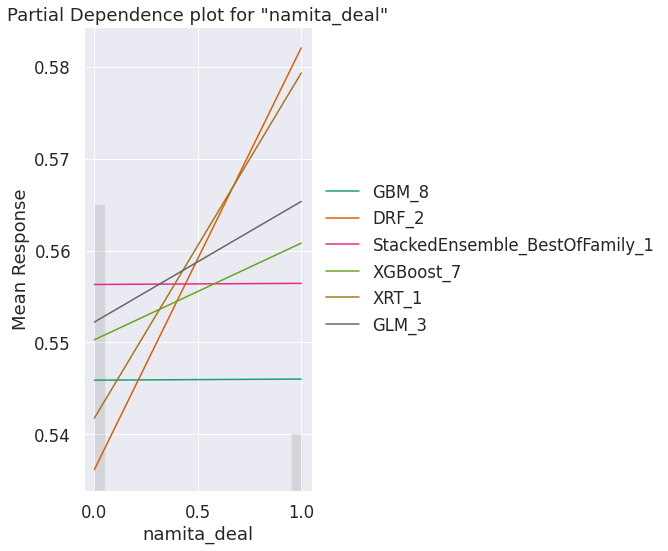

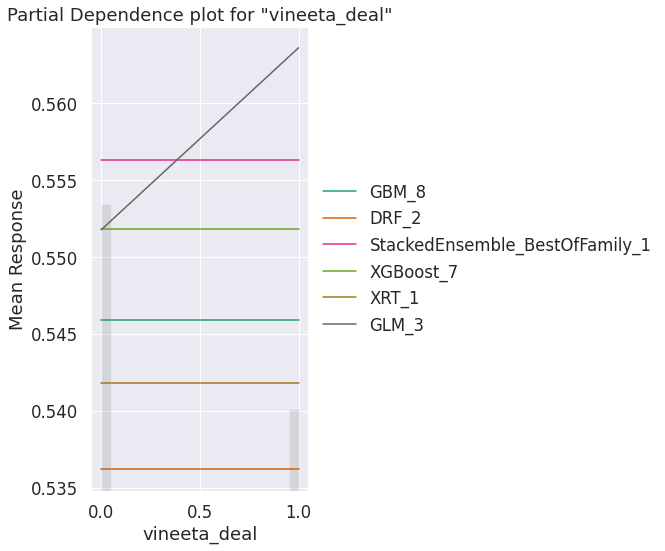

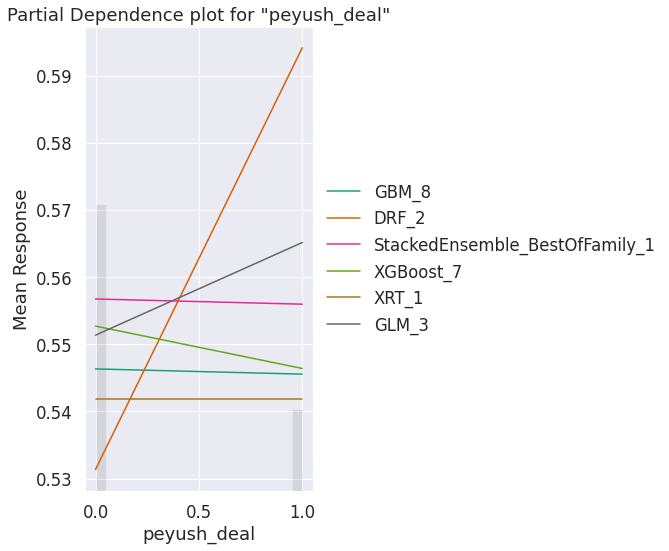

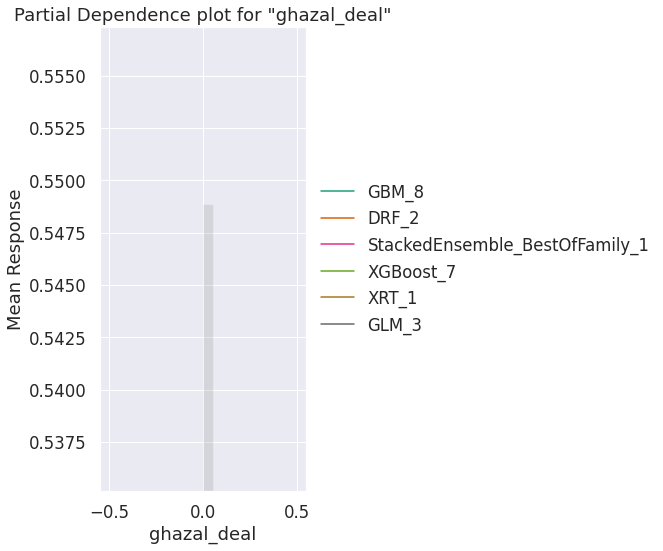

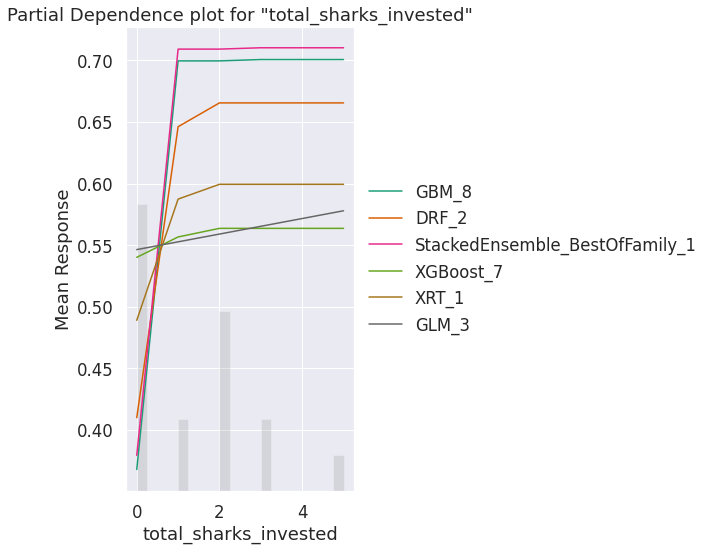

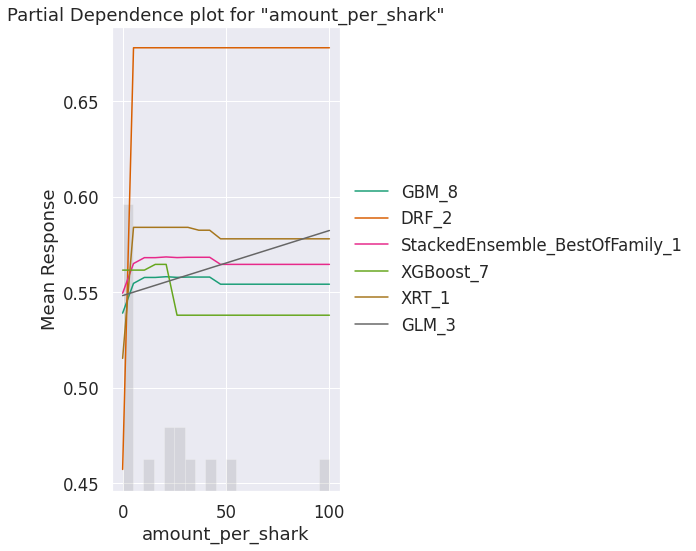

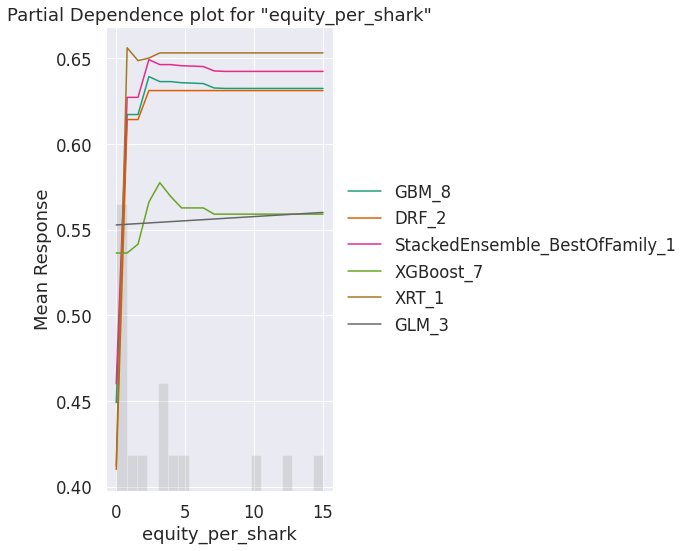

In [133]:
explain_model = aml.explain(frame = test, figsize = (10,8),include_explanations=['pdp'])

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

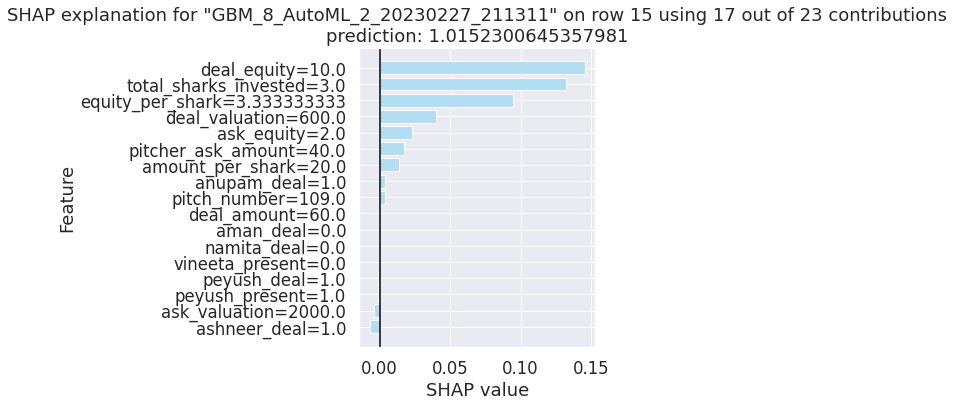

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [103]:
aml.explain_row(frame = test, row_index = 15, figsize = (8,6), exclude_explanations = "leaderboard")

##Conclusion:




##References:


H2O AI AutoML - https://docs.h2o.ai/


https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e


http://net-informations.com/ds/mla/ols.html



##Licences:

MIT License

Copyright (c) 2023 Amrutha Sai Edara

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE